In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import importlib

import src
import utils          

importlib.reload(src)
importlib.reload(utils)

from src import DifferentialEvolution, Constraints
from utils import FitnessFunc


In [ ]:

def eggholder(v):
    x, y = v[0], v[1]
    return -(y+47)*np.sin(np.sqrt(abs(x/2 + (y+47)))) - x*np.sin(np.sqrt(abs(x-(y+47))))

def holder_table(v):
    x, y = v[0], v[1]
    return -abs(np.sin(x)*np.cos(y)*np.exp(abs(1 - np.sqrt(x**2 + y**2)/np.pi)))

egg_constraints = [
    Constraints(lambda vec: vec[0] - 512, "<="),
    Constraints(lambda vec: -vec[0] - 512, "<="),
    Constraints(lambda vec: vec[1] - 512, "<="),
    Constraints(lambda vec: -vec[1] - 512, "<="),
]

holder_constraints = [
    Constraints(lambda vec: vec[0] - 10, "<="),
    Constraints(lambda vec: -vec[0] - 10, "<="),
    Constraints(lambda vec: vec[1] - 10, "<="),
    Constraints(lambda vec: -vec[1] - 10, "<="),
]


In [ ]:
problem = "eggholder" 
fitness = FitnessFunc(eggholder, optimisation_option="min") if problem=="eggholder" \
          else FitnessFunc(holder_table, optimisation_option="min")
constraints = egg_constraints if problem=="eggholder" else holder_constraints

de = DifferentialEvolution(
    population_size=50,
    no_of_gens=200,
    no_design_vars=2,
    fitness_func=fitness,
    constraints=constraints,
    crossover_prob=0.8,
    K=0.5,
    optimisation_option="min",
)

print("[DE] starting...")
de.run()
print("[DE] finished. generations recorded:", len(de.generations))


[DE] starting...
[DE] generation 0/200
[DE] generation 10/200
[DE] generation 20/200
[DE] generation 30/200
[DE] generation 40/200
[DE] generation 50/200
[DE] generation 60/200
[DE] generation 70/200
[DE] generation 80/200
[DE] generation 90/200
[DE] generation 100/200
[DE] generation 110/200
[DE] generation 120/200
[DE] generation 130/200
[DE] generation 140/200
[DE] generation 150/200
[DE] generation 160/200
[DE] generation 170/200
[DE] generation 180/200
[DE] generation 190/200
[DE] finished. generations recorded: 200


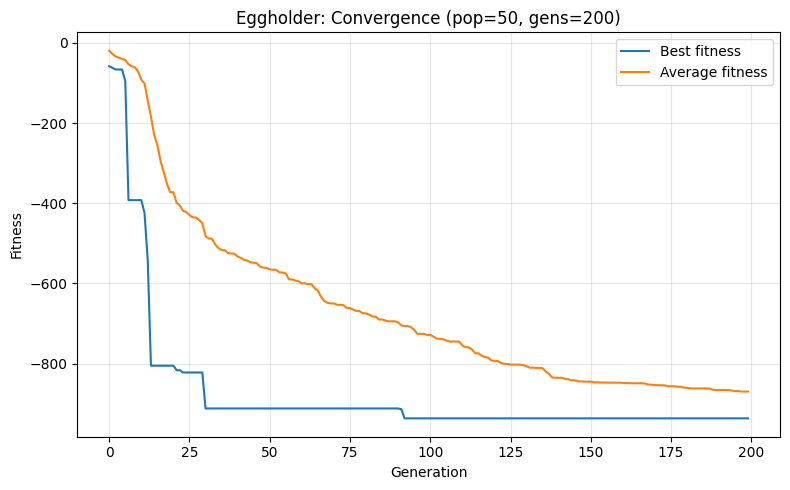

In [4]:
gens_sorted = sorted(de.generations.keys())
best_hist, avg_hist = [], []

for g in gens_sorted:
    pop = de.generations[g]
    _, vals = de.fitness.checkOptima(pop)
    vals = np.asarray(vals, dtype=float)
    best = np.min(vals) if de.fitness.opt=="min" else np.max(vals)
    best_hist.append(best)
    avg_hist.append(vals.mean())

plt.figure(figsize=(8,5))
plt.plot(best_hist, label="Best fitness")
plt.plot(avg_hist, label="Average fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title(f"{problem.capitalize()}: Convergence (pop={de.popl_size}, gens={de.number_gens})")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()


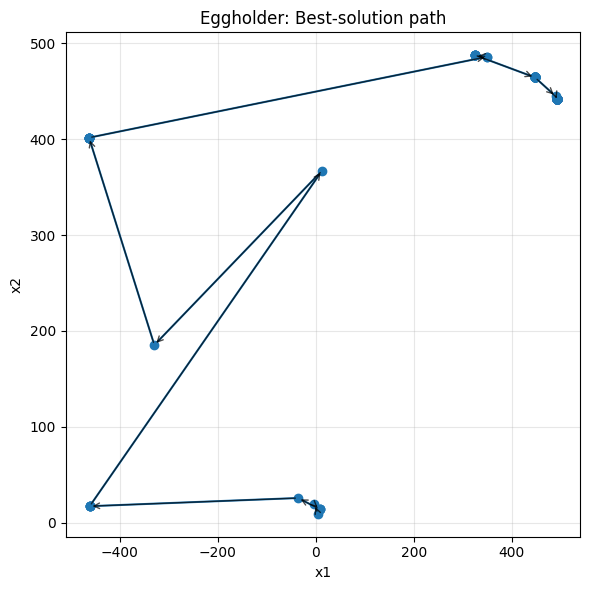

In [ ]:
best_vecs = []
for g in gens_sorted:
    pop = de.generations[g]
    best_idx, _ = de.fitness.checkOptima(pop)
    best_vecs.append(np.asarray(pop[best_idx].vector, dtype=float))

best_mat = np.vstack(best_vecs)  # (G, 2)

plt.figure(figsize=(6,6))
plt.plot(best_mat[:,0], best_mat[:,1], marker="o")

for i in range(len(best_mat)-1):
    x0,y0 = best_mat[i]
    x1,y1 = best_mat[i+1]
    plt.annotate("", xy=(x1,y1), xytext=(x0,y0),
                 arrowprops=dict(arrowstyle="->", lw=1, alpha=0.7))
plt.xlabel("x1"); plt.ylabel("x2")
plt.title(f"{problem.capitalize()}: Best-solution path")
plt.grid(True, alpha=0.3)
plt.tight_layout()


In [ ]:
problem = "holder"  
fitness = FitnessFunc(eggholder, optimisation_option="min") if problem=="eggholder" \
          else FitnessFunc(holder_table, optimisation_option="min")
constraints = egg_constraints if problem=="eggholder" else holder_constraints

de = DifferentialEvolution(
    population_size=50,
    no_of_gens=200,
    no_design_vars=2,
    fitness_func=fitness,
    constraints=constraints,
    crossover_prob=0.8,
    K=0.5,
    optimisation_option="min",
)

print("[DE] starting…")
de.run()
print("[DE] finished. generations recorded:", len(de.generations))



[DE] starting…
[DE] generation 0/200
[DE] generation 10/200
[DE] generation 20/200
[DE] generation 30/200
[DE] generation 40/200
[DE] generation 50/200
[DE] generation 60/200
[DE] generation 70/200
[DE] generation 80/200
[DE] generation 90/200
[DE] generation 100/200
[DE] generation 110/200
[DE] generation 120/200
[DE] generation 130/200
[DE] generation 140/200
[DE] generation 150/200
[DE] generation 160/200
[DE] generation 170/200
[DE] generation 180/200
[DE] generation 190/200
[DE] finished. generations recorded: 200


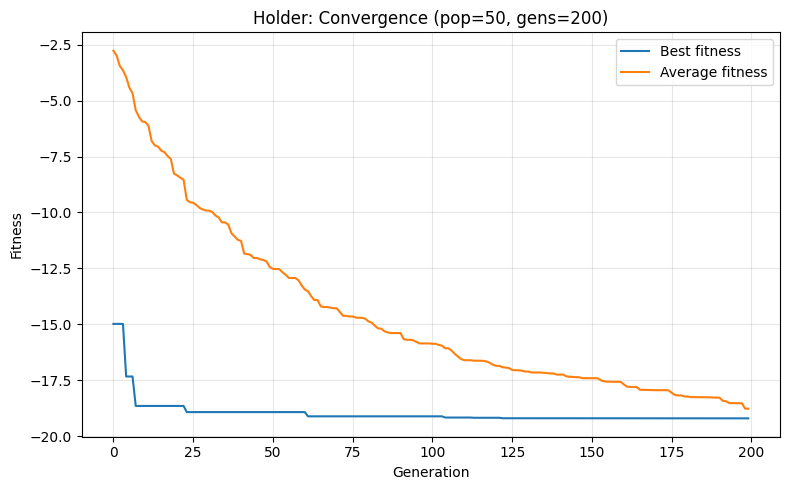

In [7]:
gens_sorted = sorted(de.generations.keys())
best_hist, avg_hist = [], []

for g in gens_sorted:
    pop = de.generations[g]
    _, vals = de.fitness.checkOptima(pop)
    vals = np.asarray(vals, dtype=float)
    best = np.min(vals) if de.fitness.opt=="min" else np.max(vals)
    best_hist.append(best)
    avg_hist.append(vals.mean())

plt.figure(figsize=(8,5))
plt.plot(best_hist, label="Best fitness")
plt.plot(avg_hist, label="Average fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title(f"{problem.capitalize()}: Convergence (pop={de.popl_size}, gens={de.number_gens})")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()


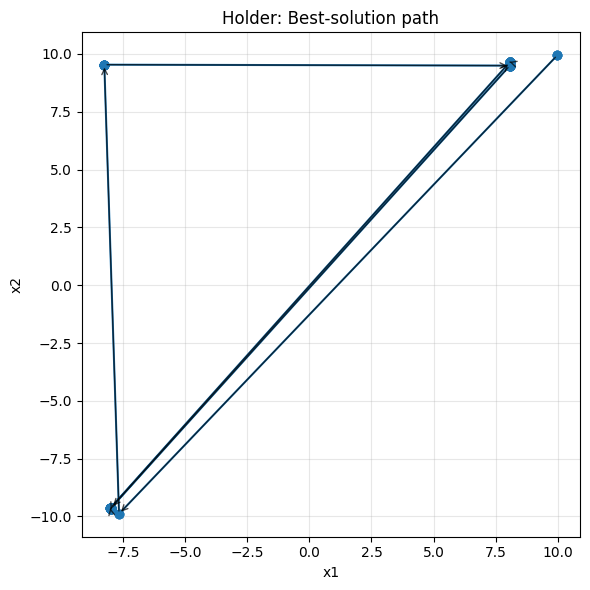

In [ ]:
best_vecs = []
for g in gens_sorted:
    pop = de.generations[g]
    best_idx, _ = de.fitness.checkOptima(pop)
    best_vecs.append(np.asarray(pop[best_idx].vector, dtype=float))

best_mat = np.vstack(best_vecs)  # (G, 2)

plt.figure(figsize=(6,6))
plt.plot(best_mat[:,0], best_mat[:,1], marker="o")

for i in range(len(best_mat)-1):
    x0,y0 = best_mat[i]
    x1,y1 = best_mat[i+1]
    plt.annotate("", xy=(x1,y1), xytext=(x0,y0),
                 arrowprops=dict(arrowstyle="->", lw=1, alpha=0.7))
plt.xlabel("x1"); plt.ylabel("x2")
plt.title(f"{problem.capitalize()}: Best-solution path")
plt.grid(True, alpha=0.3)
plt.tight_layout()
